In [1]:
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
df = fetch_california_housing()
df.data, df.target

(array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]))

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((16512, 8), (16512,), (4128, 8), (4128,))

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [6]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(x_train_scaled, y_train)

LinearRegression()

In [7]:
regression.coef_

array([ 0.83106305,  0.1169025 , -0.2662747 ,  0.29304671, -0.00253235,
       -0.04003171, -0.89605044, -0.86993849])

In [8]:
y_pred_linear = regression.predict(x_test_scaled)
y_pred_linear, y_test

(array([1.24966824, 2.07679213, 1.37803098, ..., 3.17553166, 1.82783123,
        1.46175625]),
 array([1.279, 1.489, 0.968, ..., 3.365, 2.048, 1.469]))

In [9]:
from sklearn.linear_model import Ridge

# Гребнева регресія
regression_ridge = Ridge()

In [10]:
from sklearn.linear_model import Lasso


regression_lasso = Lasso(alpha=0.01)

In [11]:
from sklearn.linear_model import PoissonRegressor

regression_poisson = PoissonRegressor()

In [12]:
models = {
    "Linear regression": regression,
    "Ridge regression": regression_ridge,
    "Lasso regression": regression_lasso,
    "Poisson regression": regression_poisson
}

models_results = {
    "Linear regression": [],
    "Ridge regression": [],
    "Lasso regression": [],
    "Poisson regression": []
}

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

for model_name, model in models.items():    
    for n in [2, 4, 8]:
        x_train_sub = x_train_scaled[:, :n]
        x_test_sub = x_test_scaled[:, :n]

        model.fit(x_train_sub, y_train)
        print(f"{model_name} coef. with {n} features: {model.coef_}")
        
        y_pred = model.predict(x_test_sub)
        temp = [mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)]
        models_results[model_name].append([f"{value}" for value in temp])
    print()

Linear regression coef. with 2 features: [0.81585972 0.21964715]
Linear regression coef. with 4 features: [ 1.02275945  0.19550891 -0.52580182  0.45531901]
Linear regression coef. with 8 features: [ 0.83106305  0.1169025  -0.2662747   0.29304671 -0.00253235 -0.04003171
 -0.89605044 -0.86993849]

Ridge regression coef. with 2 features: [0.8158081 0.2196279]
Ridge regression coef. with 4 features: [ 1.02248123  0.19551211 -0.52526269  0.4548255 ]
Ridge regression coef. with 8 features: [ 0.83103866  0.11698428 -0.26614296  0.29286284 -0.00250452 -0.0400367
 -0.89527251 -0.86915432]

Lasso regression coef. with 2 features: [0.80455809 0.20834556]
Lasso regression coef. with 4 features: [ 0.95149458  0.19026261 -0.37531578  0.31517056]
Lasso regression coef. with 8 features: [ 0.78142972  0.12266799 -0.14332414  0.16969104 -0.         -0.02994288
 -0.79145873 -0.75827183]

Poisson regression coef. with 2 features: [0.22492057 0.0562624 ]
Poisson regression coef. with 4 features: [ 0.222743

In [14]:
models_results

{'Linear regression': [['0.6952182391224209', '0.5008952154272671'],
  ['0.6734650949880011', '0.5165120357378132'],
  ['0.5748222713640009', '0.5873287986821372']],
 'Ridge regression': [['0.6952198535439109', '0.5008940564164059'],
  ['0.6734485660834013', '0.516523902019371'],
  ['0.5748223122190922', '0.5873287693518199']],
 'Lasso regression': [['0.6957627451859356', '0.5005043085634424'],
  ['0.6729244519714315', '0.5169001692779465'],
  ['0.5786318515739591', '0.5845938593450969']],
 'Poisson regression': [['0.8224423330395594', '0.40955964565405645'],
  ['0.8234639573752336', '0.40882621035952993'],
  ['0.7830242973612173', '0.43785828498543167']]}

In [15]:
import pandas as pd

table1_data = {
    'Model': list(models_results.keys()),
    '2 features': [float(result[0][0]) for result in models_results.values()],
    '4 features': [float(result[1][0]) for result in models_results.values()],
    '8 features': [float(result[2][0]) for result in models_results.values()],
}

table1 = pd.DataFrame(table1_data)
table1.set_index('Model', inplace=True)

table2_data = {
    'Model': list(models_results.keys()),
    '2 features': [result[0][1] for result in models_results.values()],
    '4 features': [result[1][1] for result in models_results.values()],
    '8 features': [result[2][1] for result in models_results.values()],
}

table2 = pd.DataFrame(table2_data)
table2.set_index('Model', inplace=True)

In [16]:
table1

,2 features,4 features,8 features
Model,,,
Linear regression,0.695218,0.673465,0.574822
Ridge regression,0.695220,0.673449,0.574822
Lasso regression,0.695763,0.672924,0.578632
Poisson regression,0.822442,0.823464,0.783024


In [17]:
table2

,2 features,4 features,8 features
Model,,,
Linear regression,0.5008952154272671,0.5165120357378132,0.5873287986821372
Ridge regression,0.5008940564164059,0.516523902019371,0.5873287693518199
Lasso regression,0.5005043085634424,0.5169001692779465,0.5845938593450969
Poisson regression,0.40955964565405645,0.40882621035952993,0.43785828498543167


In [18]:
table1['Mean'] = table1.mean(axis=1)

table1

,2 features,4 features,8 features,Mean
Model,,,,
Linear regression,0.695218,0.673465,0.574822,0.647835
Ridge regression,0.695220,0.673449,0.574822,0.647830
Lasso regression,0.695763,0.672924,0.578632,0.649106
Poisson regression,0.822442,0.823464,0.783024,0.809644


In [19]:
regression.fit(x_train_scaled, y_train)

y_pred = regression.predict(x_test_scaled)
y_train, y_pred

(array([3.382, 1.911, 2.975, ..., 1.505, 1.923, 1.358]),
 array([1.24966824, 2.07679213, 1.37803098, ..., 3.17553166, 1.82783123,
        1.46175625]))

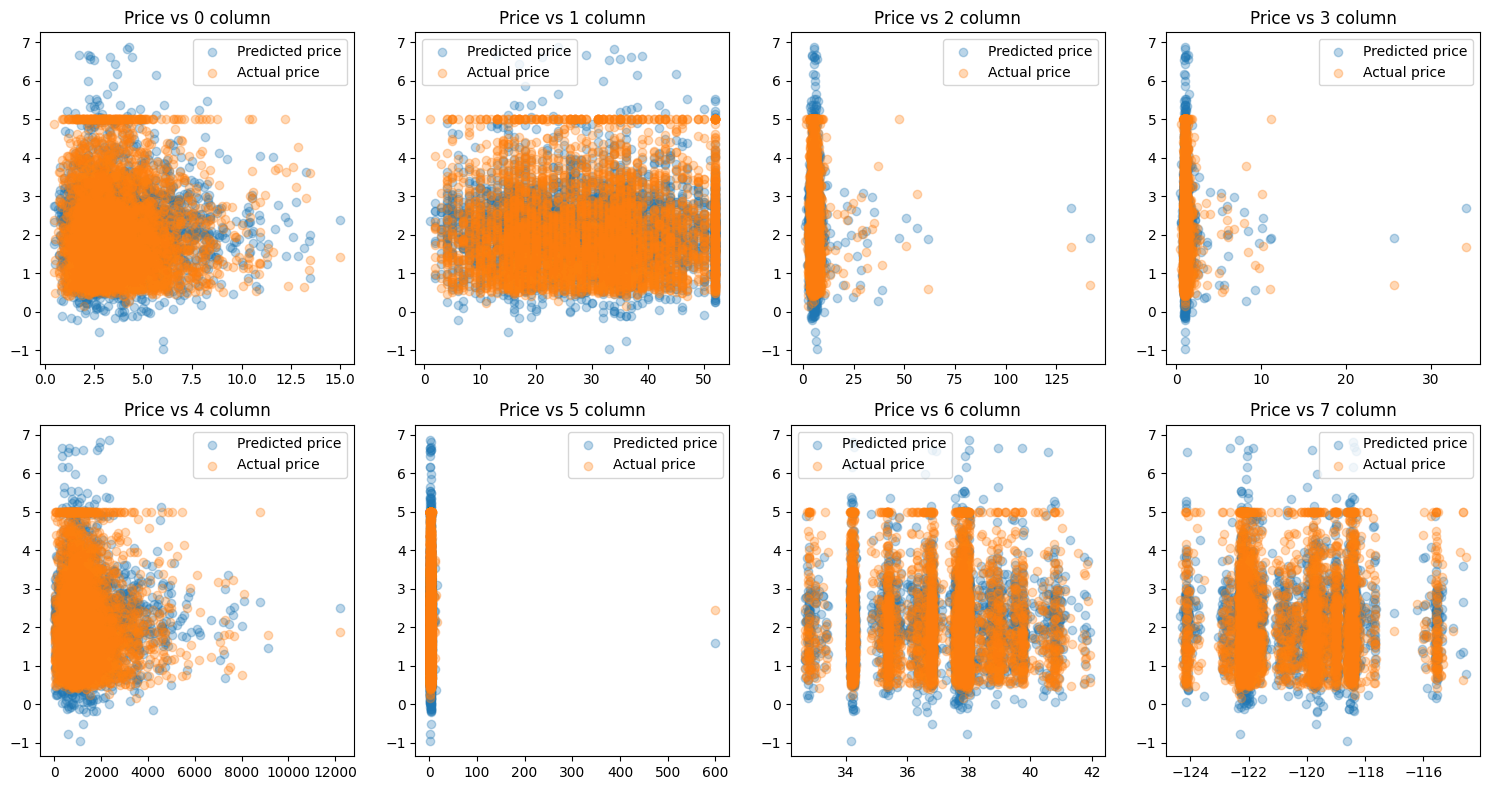

In [20]:
import matplotlib.pyplot as plt

num_columns = df.data.shape[1]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
axes = axes.flatten()

for column_index, ax in enumerate(axes):
    ax.scatter(df.data[:4128, column_index], y_pred, alpha=0.3, label='Predicted price')
    ax.scatter(df.data[:4128, column_index], y_train[:4128], alpha=0.3, label='Actual price')

    ax.set_title(f"Price vs {column_index} column")
    ax.legend()

plt.tight_layout()
plt.show()

In [21]:
# import matplotlib.pyplot as plt

# df = fetch_california_housing(as_frame=True)

# MedInc = df.frame['MedInc']

# plt.subplots(nrows=2, ncols=4)
# plt.scatter(MedInc[:4128], y_pred)